<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<h1>Sample Starting Kit </h1>
    <span style="color:red"> <h1> Keep all code below **yellow** text blocks, </h1> </span>
    <span style="color:red"> <h1> but check that it works (you can ADD not remove). </h1> </span>
    <span style="color:red"> <h1> Customize Section (1) and modify the explanations.</h1> </span>

<br>This code was tested with <br>
Python 3.8.5 |Anaconda custom (64-bit)| (default, Sep  4 2020, 02:22:02) (https://anaconda.org/)<br>
<i> Adapted for original code of Balázs Kégl</i> <br>
</center>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>
    <span style="color:red"> Here write here a short description of your problem. </span>
     <br>

In this challenge you are going to try to classify whether a picture of a lung is that of a pneumonia patient. The data in this notebook is taken from the activation layer of neural networks that where trained on the originial image data. You can try using this as an input for different ML techniques such as Support Vector Machines, Random Forest Classifiers or Neural Networks.
        
 <br>
    <span style="color:red"> Keep the next block. </span>
</div>

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
# %load_ext autoreload
# %autoreload 2
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import display

<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>
</div>

In [2]:
import os
sample_imgs_dir = 'sample_images'
sample_imgs_names = os.listdir(sample_imgs_dir)

First we show you the original data, that is radiology images from healthy and sick individuals. This data was used to create the tabular data that your classification will run on.

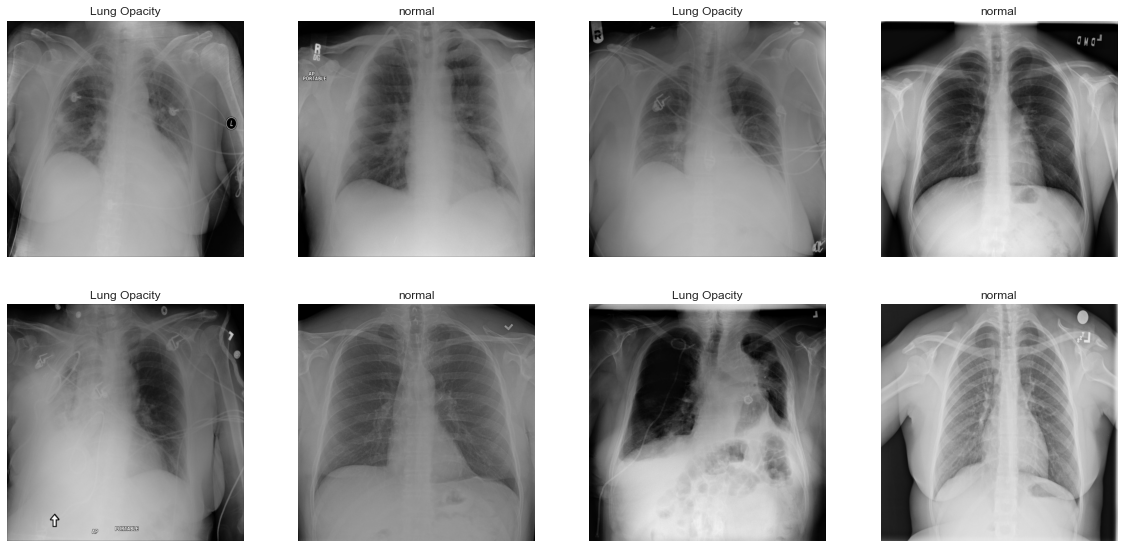

In [3]:
def show_images(images, rows=4, cols=4, figsize=(20, 20),title=None):
    figure = plt.figure(figsize=figsize)
    for idx, img in enumerate(images):
        label = img.split('_')[1].split('.')[0] 
        ax = plt.subplot(rows, cols, idx + 1)
        img = image.imread(os.path.join(sample_imgs_dir, img))
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        if idx > 6:
            break
    if title is not None:
        plt.title(title)
show_images(sample_imgs_names)

From now on we will be working with tabular data.

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data. 

In [4]:
data_dir = 'sample_data'    # Change this to the directory where you put the input data
data_name = 'Hygieia'       # The sample_data directory should contain only a very small subset of the data
!ls $data_dir*

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [5]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading sample_data/Hygieia_train from AutoML format
Number of examples = 107
Number of features = 1280
          Class
0        Normal
1  Lung Opacity
Number of classes = 2


We start with some simple statistical measurements

In [6]:
data.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1271,feature1272,feature1273,feature1274,feature1275,feature1276,feature1277,feature1278,feature1279,target
0,1.110734,1.604358,0.553044,0.471787,0.820882,0.398261,0.000000,0.964629,0.823949,0.000000,...,1.589280,0.380862,0.015603,0.317544,0.028327,0.000000,0.853063,0.240249,0.045436,Normal
1,0.386981,0.000000,2.777724,0.942658,1.012158,0.092843,0.211993,0.000000,0.072261,0.000000,...,0.414155,0.775693,0.101092,1.376500,0.013994,0.058166,0.057637,0.307627,0.363143,Lung Opacity
2,0.839763,1.054007,0.000000,0.399965,0.251131,1.089134,0.310410,0.854258,0.369370,0.699931,...,0.011697,0.094155,0.254464,0.000000,0.152367,0.531968,0.000000,0.555436,0.111866,Normal
3,0.657556,0.777506,0.461226,0.066681,0.075071,0.335948,0.489296,0.670935,0.000000,0.084325,...,0.228124,0.156360,0.000000,0.106472,0.052506,0.294047,1.085916,1.051644,0.048431,Lung Opacity
4,1.386921,0.403377,2.471923,0.029647,0.408626,0.188153,0.179230,0.003468,0.000000,0.000000,...,0.544613,0.038199,0.457813,0.090204,0.000000,0.142561,0.000000,0.000000,0.048283,Lung Opacity


In [7]:
data.describe() 

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1270,feature1271,feature1272,feature1273,feature1274,feature1275,feature1276,feature1277,feature1278,feature1279
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.403316,0.571402,0.590186,0.508200,0.399650,0.356397,0.310492,0.330850,0.464957,0.428103,...,0.516511,0.495120,0.487929,0.426834,0.458749,0.623007,0.468146,0.511184,0.427537,0.404890
std,0.490206,0.568905,0.684221,0.560118,0.478345,0.466541,0.415410,0.452691,0.521167,0.541982,...,0.604975,0.552472,0.669284,0.520396,0.541816,0.677183,0.579603,0.507435,0.478171,0.413124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054203,0.133491,0.046554,0.062669,0.048085,0.007025,0.032398,0.005199,0.072639,0.008417,...,0.052468,0.065946,0.024630,0.041590,0.021896,0.087068,0.052722,0.062350,0.079492,0.069364
50%,0.189080,0.417837,0.341188,0.306482,0.264382,0.156031,0.162229,0.177010,0.263915,0.177235,...,0.357338,0.320004,0.183116,0.260247,0.253558,0.429648,0.255589,0.413052,0.305275,0.290777
75%,0.571948,0.821821,0.877657,0.722886,0.582882,0.453983,0.456554,0.426233,0.696008,0.667569,...,0.763851,0.714390,0.754055,0.581724,0.728074,0.962430,0.546996,0.832511,0.528607,0.575315
max,2.153466,2.415168,2.783894,3.068490,2.404864,2.439758,2.040731,2.518784,2.489594,2.375565,...,2.753995,2.495446,3.324427,3.057291,2.253329,2.856352,2.869055,2.428206,1.939159,1.982834


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Columns: 1281 entries, feature0 to target
dtypes: float64(1280), object(1)
memory usage: 1.0+ MB


In [9]:
data["label"]=data["target"].map(lambda label:0 if label == "Normal" else 1)
data.shape

(107, 1282)

We are now going to preprocess the data a little bit. For this we will use a Principal Component Analysis.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
x_pca=pca.fit_transform(data.iloc[:,:-2])

In [12]:
print(pca.explained_variance_ratio_[:30])

[0.09456337 0.04643666 0.04232507 0.03195067 0.02920624 0.0269637
 0.02575416 0.02476913 0.02353043 0.02186228 0.02056795 0.01974594
 0.01918352 0.01817413 0.01762533 0.01640116 0.01588491 0.01535393
 0.01506252 0.01412129 0.01336089 0.01307188 0.01276857 0.01226178
 0.01188357 0.01142267 0.01121569 0.01071142 0.01033577 0.0100619 ]


We can see that the the two first components are already enough to loosely seperate the two classes on their own.

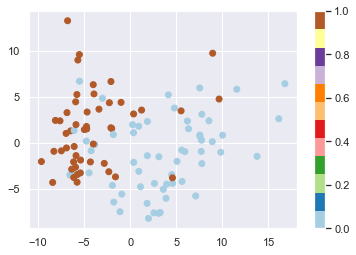

In [13]:
# scatter the top 2 principal components, with label as color
plt.scatter(x_pca[:,0], x_pca[:,1], c=data["label"],cmap="Paired", )
plt.colorbar()
plt.show()

In [14]:
xcorr = data.iloc[:,:-2].corr()

In [15]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

desc_xcorr = xcorr.abs().unstack().sort_values(ascending = False)
desc_xcorr = desc_xcorr.reset_index()
desc_xcorr = desc_xcorr[(desc_xcorr.iloc[:, 0] != desc_xcorr.iloc[:, 1])]
display(desc_xcorr.iloc[:10])

,level_0,level_1,0
1280,feature881,feature155,0.790621
1281,feature155,feature881,0.790621
1282,feature976,feature881,0.752782
1283,feature881,feature976,0.752782
1284,feature881,feature11,0.749036
1285,feature11,feature881,0.749036
1286,feature177,feature323,0.727771
1287,feature323,feature177,0.727771
1288,feature155,feature11,0.704185
1289,feature11,feature155,0.704185


In [16]:
top_corr_feat = desc_xcorr.iloc[:10, 0].unique()

<AxesSubplot:>

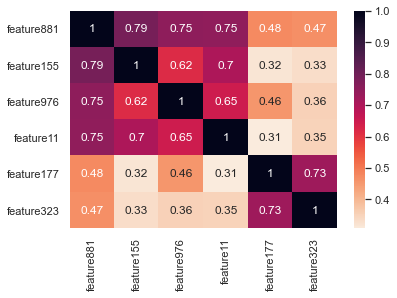

In [17]:
# heatmap of top correlation
sns.heatmap(xcorr.loc[top_corr_feat, top_corr_feat], annot=True, cmap='rocket_r')

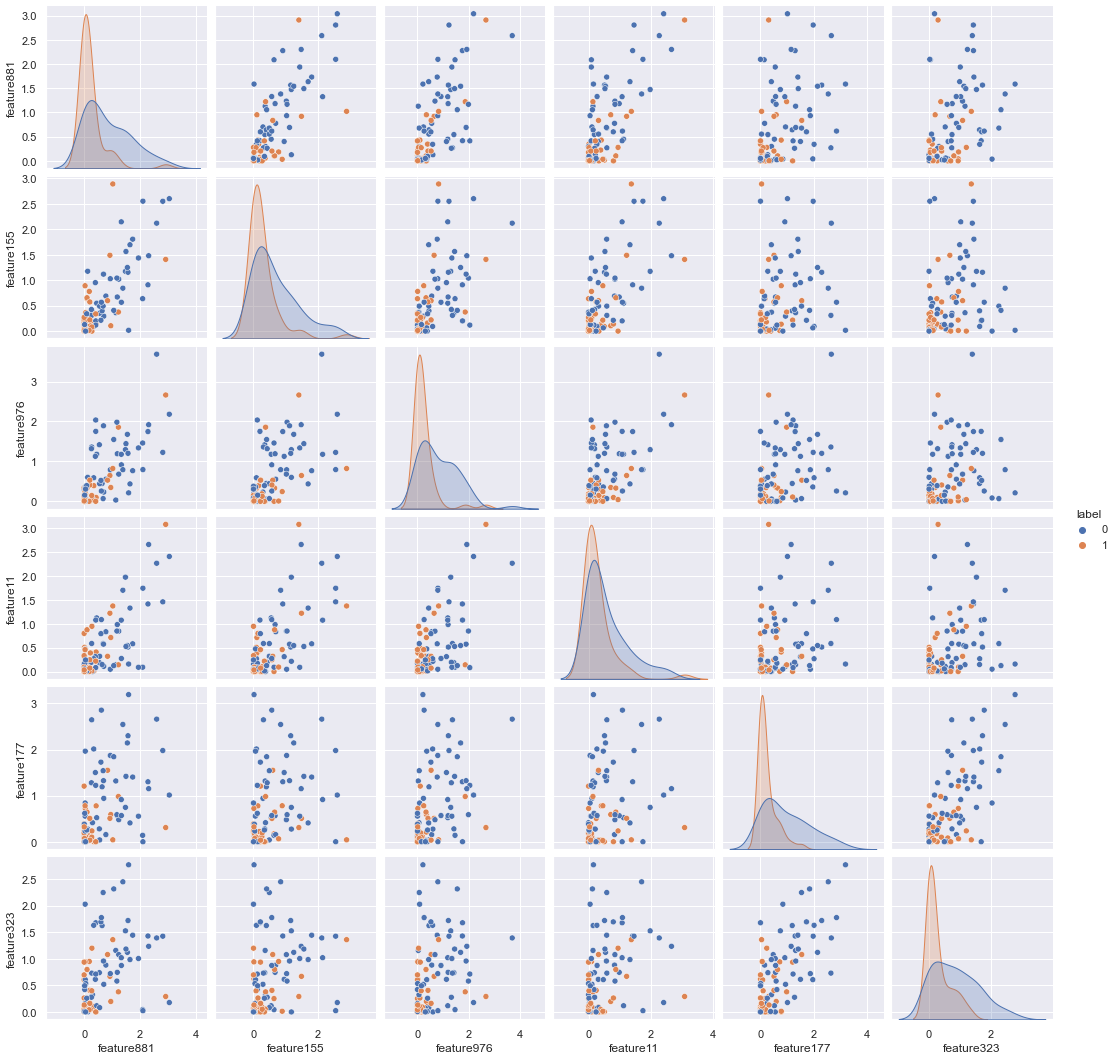

In [18]:
# pairplot of top correlation, with label as color
sns.pairplot(data, vars=top_corr_feat, hue='label')

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [19]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file NOT found : D:\Users\Alex\Desktop\University\T3\Project A\subir coda y github\upsaclay-hygieia\starting_kit\sample_data\Hygieia_public.info
DataManager : Hygieia
info:
	usage = No Info File
	name = Hygieia
	format = dense
	is_sparse = 0
	has_categorical = 0
	has_missing = 0
	target_num = 1
	label_num = 2
	task = binary.classification
	target_type = Binary
	metric = auc_metric
	feat_type = Mixed
	feat_num = 1280
	train_num = 107
	valid_num = 13
	test_num = 14
	time_budget = 600
data:
	X_train = array(107, 1280)
	Y_train = array(107,)
	X_valid = array(13, 1280)
	Y_valid = array(13,)
	X_test = array(14, 1280)
	Y_test = array(14,)
feat_type:	array(1280,)
feat_idx:	array(0,)



In [20]:
D.data["Y_valid"]

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.])

<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [21]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
#??model 

<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [22]:
#M = model()
#trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)             
from sklearn.ensemble import RandomForestClassifier
M = RandomForestClassifier(max_depth=5, random_state=0)
M.fit(D.data['X_train'],D.data['Y_train'])

RandomForestClassifier(max_depth=5, random_state=0)

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [23]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

In [24]:
D.data['Y_train'].shape

(107,)

<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [25]:
#M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

"ls" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [26]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy_score


<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [27]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy_score metric = 1.0000
Ideal score for the accuracy_score metric = 1.0000


You can add here other scores and result visualization.

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[58,  0],
       [ 0, 49]], dtype=int64)

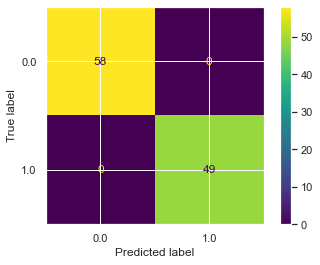

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(M, X_train, Y_train)  

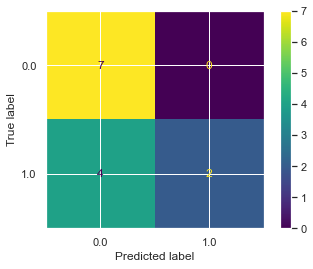

In [30]:
plot_confusion_matrix(M, D.data["X_valid"], D.data["Y_valid"])  

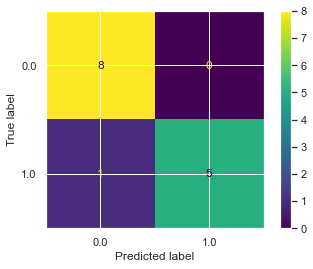

In [31]:
plot_confusion_matrix(M, D.data["X_test"], D.data["Y_test"])  

<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [32]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.79 (+/- 0.09)


<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [33]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

"source" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [34]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

"source" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [35]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_21-02-02-09-13.zip
../sample_result_submission_21-02-02-09-13.zip
